# Exploratory Data Analysis - Statistical Arbitrage Trading Engine

**Day 3 Deliverable**: Quick EDA notebook to understand our price data universe

This notebook covers:
1. Loading cached price data
2. Visualizing price series and returns
3. Checking for missing data
4. Computing correlation matrix
5. Initial pair identification

## 1. Setup & Imports

In [ ]:
import sys
import os
import warnings
warnings.filterwarnings('ignore')

# Add parent directory to path
sys.path.insert(0, os.path.abspath('..'))

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Our modules
from src.data import DataDownloader
from src.utils import calculate_returns, calculate_log_returns

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.4f}'.format)

print("✓ All imports successful!")

✓ All imports successful!


## 2. Load Data

We'll load the cached price data downloaded earlier.

In [ ]:
# Initialize downloader
downloader = DataDownloader()

# Define our universe
tech_stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'NVDA', 'TSLA']
financials = ['JPM', 'BAC', 'GS', 'WFC', 'MS']
consumer = ['WMT', 'HD', 'NKE', 'MCD', 'SBUX']
energy = ['XOM', 'CVX', 'COP']
etfs = ['SPY', 'QQQ', 'IWM', 'DIA']

all_symbols = tech_stocks + financials + consumer + energy + etfs

print(f"Universe: {len(all_symbols)} symbols")
print(f"Categories: Tech({len(tech_stocks)}), Finance({len(financials)}), "
      f"Consumer({len(consumer)}), Energy({len(energy)}), ETFs({len(etfs)})")

# Load aligned price data
prices = downloader.align_data(all_symbols, price_type='Close')
print(f"\n✓ Loaded price data: {prices.shape[0]} days × {prices.shape[1]} symbols")
print(f"Date range: {prices.index[0].date()} to {prices.index[-1].date()}")

prices.head()

Universe: 24 symbols
Categories: Tech(7), Finance(5), Consumer(5), Energy(3), ETFs(4)

✓ Loaded price data: 1517 days × 24 symbols
Date range: 2020-01-02 to 2026-01-14


,AAPL,MSFT,GOOGL,AMZN,META,NVDA,TSLA,JPM,BAC,GS,WFC,MS,WMT,HD,NKE,MCD,SBUX,XOM,CVX,COP,SPY,QQQ,IWM,DIA
Date,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-02 00:00:00-05:00,72.4683,152.5057,67.9208,94.9005,208.3248,5.9711,28.6840,119.0364,30.7605,203.1826,46.0524,43.0697,36.4338,189.9894,94.2733,174.7648,78.2217,53.6617,92.9179,52.5638,297.6990,208.5802,153.7060,258.5780
2020-01-03 00:00:00-05:00,71.7637,150.6067,67.5655,93.7485,207.2225,5.8755,29.5340,117.4656,30.1218,200.8067,45.7697,42.3745,36.1122,189.3580,94.0150,174.1468,77.7665,53.2303,92.5965,52.7565,295.4447,206.6696,153.1034,256.5173
2020-01-06 00:00:00-05:00,72.3356,150.9960,69.3664,95.1440,211.1252,5.9001,30.1027,117.3722,30.0786,202.8618,45.4955,42.2255,36.0387,190.2489,93.9320,176.1052,77.1537,53.6390,92.2828,53.3828,296.5719,208.0013,153.3074,257.1088
2020-01-07 00:00:00-05:00,71.9954,149.6193,69.2324,95.3430,211.5820,5.9716,31.2707,115.3767,29.8801,204.1972,45.1185,42.1427,35.7048,189.0034,93.8858,176.3663,76.9173,53.2000,91.1044,53.3828,295.7380,207.9723,152.7974,255.9979
2020-01-08 00:00:00-05:00,73.1535,152.0025,69.7252,94.5985,213.7271,5.9828,32.8093,116.2768,30.1822,206.1655,45.2556,42.6807,35.5823,191.8317,93.6737,179.2211,77.8103,52.3978,90.0637,52.1462,297.3141,209.5355,153.2703,257.4848


## 3. Data Quality Checks

Check for missing values and data integrity issues.

In [ ]:
# Check for missing values
missing = prices.isnull().sum()
print("Missing values per symbol:")
print(missing[missing > 0] if missing.sum() > 0 else "✓ No missing values!")

# Basic statistics
print("\n" + "="*70)
print("PRICE STATISTICS")
print("="*70)
stats = prices.describe()
print(stats.T[['mean', 'std', 'min', 'max']])

Missing values per symbol:
✓ No missing values!

PRICE STATISTICS
          mean      std      min      max
AAPL  165.5192  50.1327  54.2643 286.1900
MSFT  317.0872 101.6173 128.9299 541.0574
GOOGL 134.6617  51.8424  52.3113 335.9700
AMZN  158.9622  40.3686  81.8200 254.0000
META  362.3655 181.1964  88.2932 788.8238
NVDA   58.3386  57.3449   4.8911 207.0285
TSLA  238.4371  98.2860  24.0813 489.8800
JPM   160.4472  64.8953  67.1050 334.6100
BAC    34.3896   8.5992  15.7042  57.2500
GS    380.2814 171.8940 117.7502 955.4700
WFC    47.4405  17.8443  18.7546  96.3900
MS     86.2512  32.6604  23.1674 187.7500
WMT    57.9697  21.9104  31.8727 120.3600
HD    302.2797  58.0078 132.4788 420.8770
NKE   101.2996  26.2178  52.3108 166.2468
MCD   243.3949  43.4257 120.0767 319.6500
SBUX   87.4955  11.7861  49.5441 113.5653
XOM    80.4652  29.8753  24.1451 130.2000
CVX   121.5658  32.7662  41.9739 167.2400
COP    79.7653  28.9343  18.3326 126.4352
SPY   442.3518 110.3621 205.5046 695.1600
QQQ   374.

## 4. Price Visualization

Plot normalized price series for visual comparison.

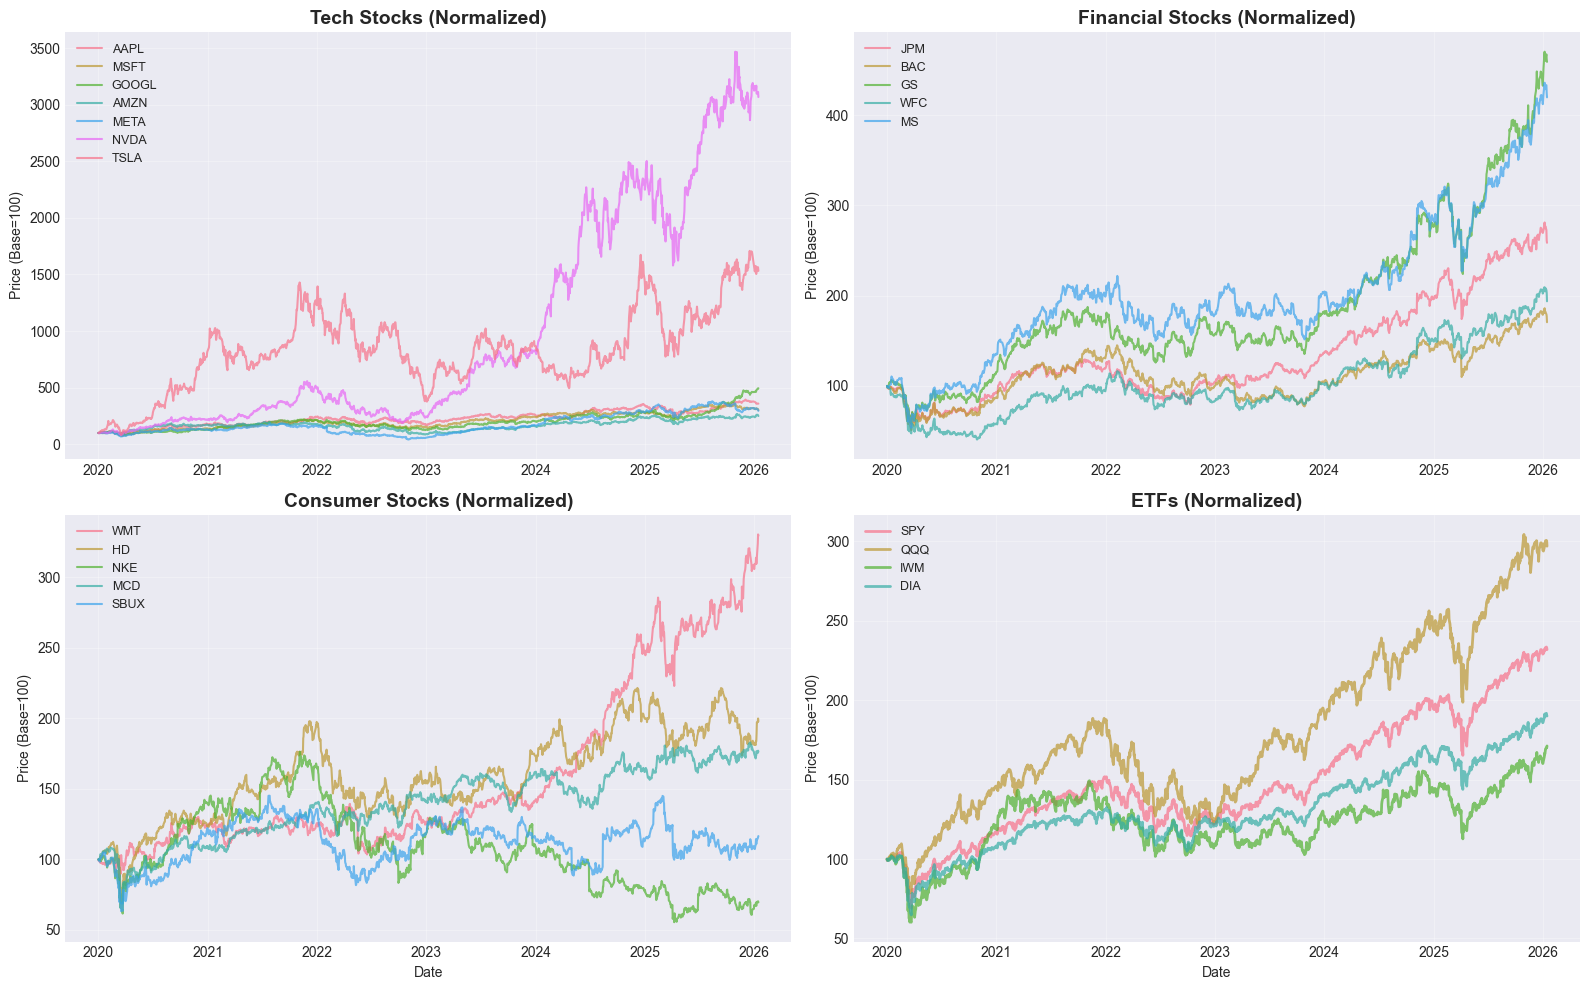

In [ ]:
# Normalize prices to start at 100 for comparison
normalized = (prices / prices.iloc[0]) * 100

# Plot by sector
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Tech stocks
for sym in tech_stocks:
    if sym in normalized.columns:
        axes[0, 0].plot(normalized.index, normalized[sym], label=sym, alpha=0.7)
axes[0, 0].set_title('Tech Stocks (Normalized)', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Price (Base=100)')
axes[0, 0].legend(loc='best', fontsize=9)
axes[0, 0].grid(True, alpha=0.3)

# Financials
for sym in financials:
    if sym in normalized.columns:
        axes[0, 1].plot(normalized.index, normalized[sym], label=sym, alpha=0.7)
axes[0, 1].set_title('Financial Stocks (Normalized)', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Price (Base=100)')
axes[0, 1].legend(loc='best', fontsize=9)
axes[0, 1].grid(True, alpha=0.3)

# Consumer stocks
for sym in consumer:
    if sym in normalized.columns:
        axes[1, 0].plot(normalized.index, normalized[sym], label=sym, alpha=0.7)
axes[1, 0].set_title('Consumer Stocks (Normalized)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Price (Base=100)')
axes[1, 0].legend(loc='best', fontsize=9)
axes[1, 0].grid(True, alpha=0.3)

# ETFs
for sym in etfs:
    if sym in normalized.columns:
        axes[1, 1].plot(normalized.index, normalized[sym], label=sym, alpha=0.7, linewidth=2)
axes[1, 1].set_title('ETFs (Normalized)', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Price (Base=100)')
axes[1, 1].legend(loc='best', fontsize=9)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Returns Analysis

Calculate and visualize log returns.

In [ ]:
# Calculate log returns
log_returns = np.log(prices / prices.shift(1)).dropna()

print(f"Log Returns Shape: {log_returns.shape}")
print(f"\nLog Returns Statistics:")
print(log_returns.describe().T[['mean', 'std', 'min', 'max']])

# Annualized statistics (assuming 252 trading days)
annual_return = log_returns.mean() * 252
annual_vol = log_returns.std() * np.sqrt(252)
sharpe = annual_return / annual_vol

stats_df = pd.DataFrame({
    'Annual Return': annual_return * 100,
    'Annual Vol': annual_vol * 100,
    'Sharpe Ratio': sharpe
}).sort_values('Sharpe Ratio', ascending=False)

print("\n" + "="*70)
print("ANNUALIZED STATISTICS (sorted by Sharpe)")
print("="*70)
print(stats_df)

Log Returns Shape: (1516, 24)

Log Returns Statistics:
         mean    std     min    max
AAPL   0.0008 0.0199 -0.1377 0.1426
MSFT   0.0007 0.0186 -0.1595 0.1329
GOOGL  0.0011 0.0204 -0.1237 0.0973
AMZN   0.0006 0.0225 -0.1514 0.1269
META   0.0007 0.0278 -0.3064 0.2093
NVDA   0.0023 0.0332 -0.2040 0.2181
TSLA   0.0018 0.0417 -0.2365 0.2045
JPM    0.0006 0.0197 -0.1621 0.1656
BAC    0.0004 0.0216 -0.1672 0.1638
GS     0.0010 0.0206 -0.1359 0.1620
WFC    0.0004 0.0237 -0.1728 0.1357
MS     0.0009 0.0219 -0.1696 0.1804
WMT    0.0008 0.0145 -0.1208 0.1107
HD     0.0005 0.0178 -0.2206 0.1288
NKE   -0.0002 0.0228 -0.2229 0.1444
MCD    0.0004 0.0143 -0.1729 0.1666
SBUX   0.0001 0.0213 -0.1768 0.2191
XOM    0.0006 0.0207 -0.1304 0.1194
CVX    0.0004 0.0216 -0.2501 0.2049
COP    0.0004 0.0270 -0.2856 0.2249
SPY    0.0006 0.0131 -0.1159 0.0999
QQQ    0.0007 0.0159 -0.1276 0.1134
IWM    0.0004 0.0168 -0.1423 0.0875
DIA    0.0004 0.0127 -0.1365 0.1045

ANNUALIZED STATISTICS (sorted by Sharpe)
   

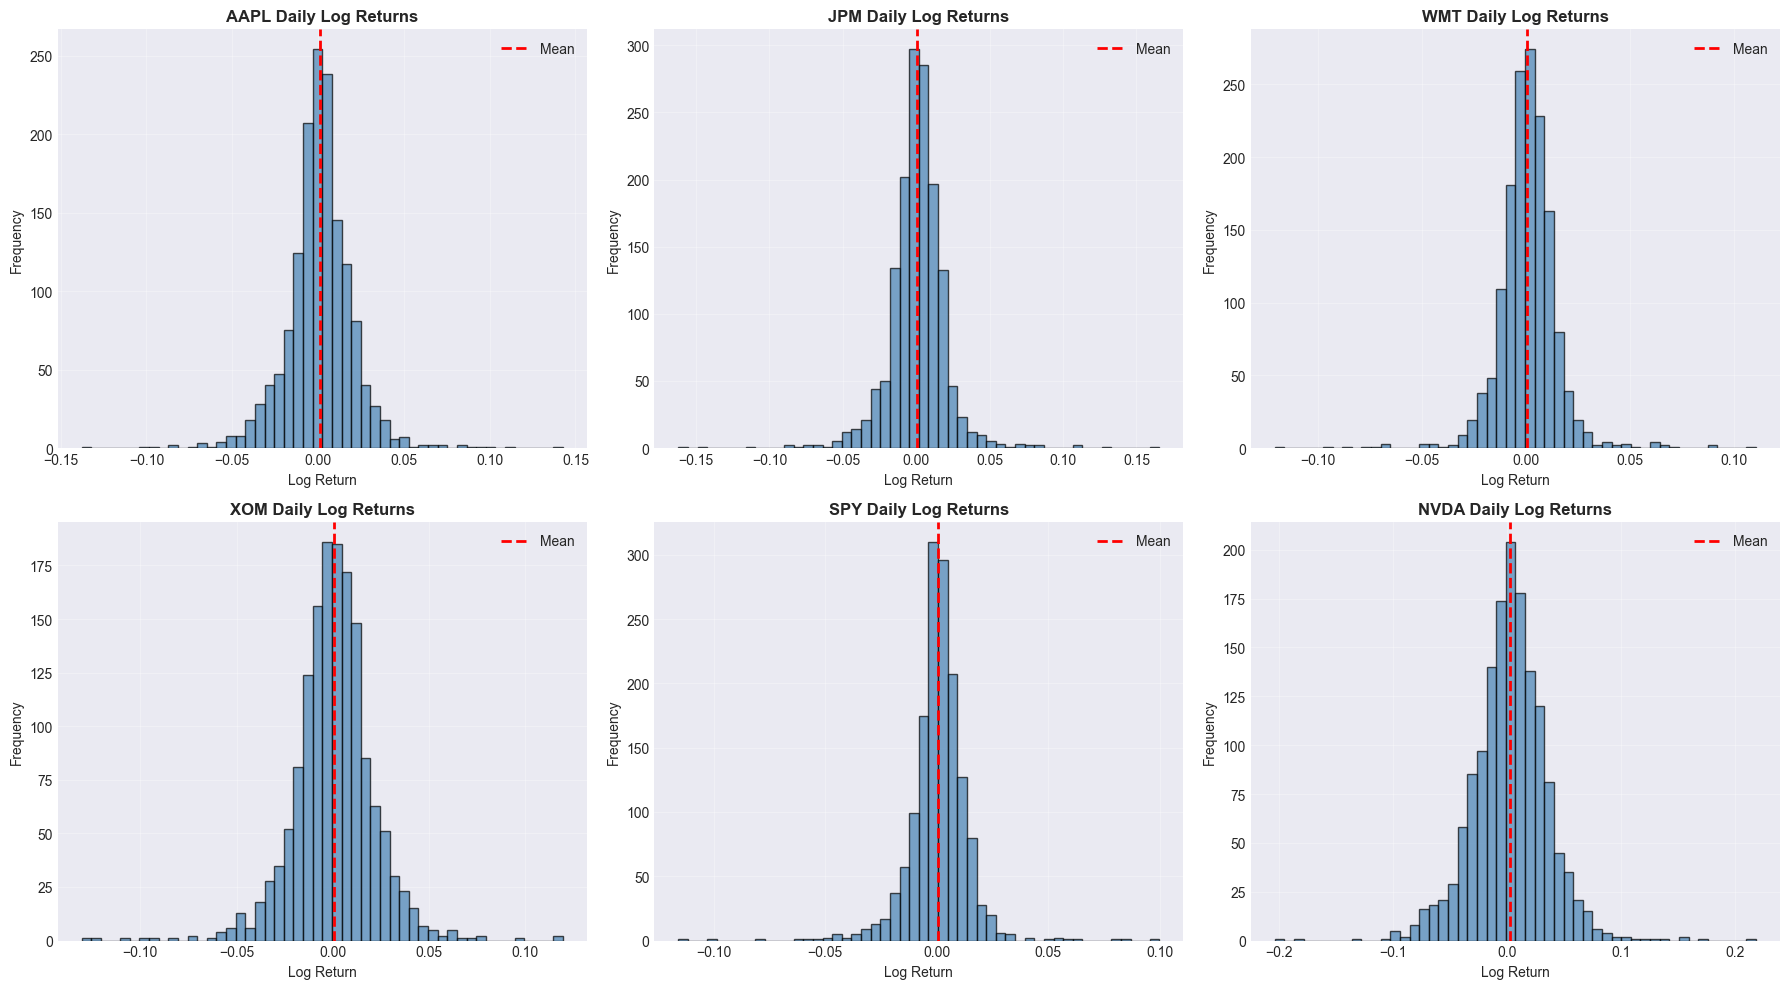

In [ ]:
# Plot return distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Select 6 diverse symbols
sample_symbols = ['AAPL', 'JPM', 'WMT', 'XOM', 'SPY', 'NVDA']

for i, sym in enumerate(sample_symbols):
    if sym in log_returns.columns:
        axes[i].hist(log_returns[sym], bins=50, alpha=0.7, color='steelblue', edgecolor='black')
        axes[i].axvline(log_returns[sym].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
        axes[i].set_title(f'{sym} Daily Log Returns', fontsize=12, fontweight='bold')
        axes[i].set_xlabel('Log Return')
        axes[i].set_ylabel('Frequency')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Correlation Analysis

Compute correlation matrix to identify potential pairs.

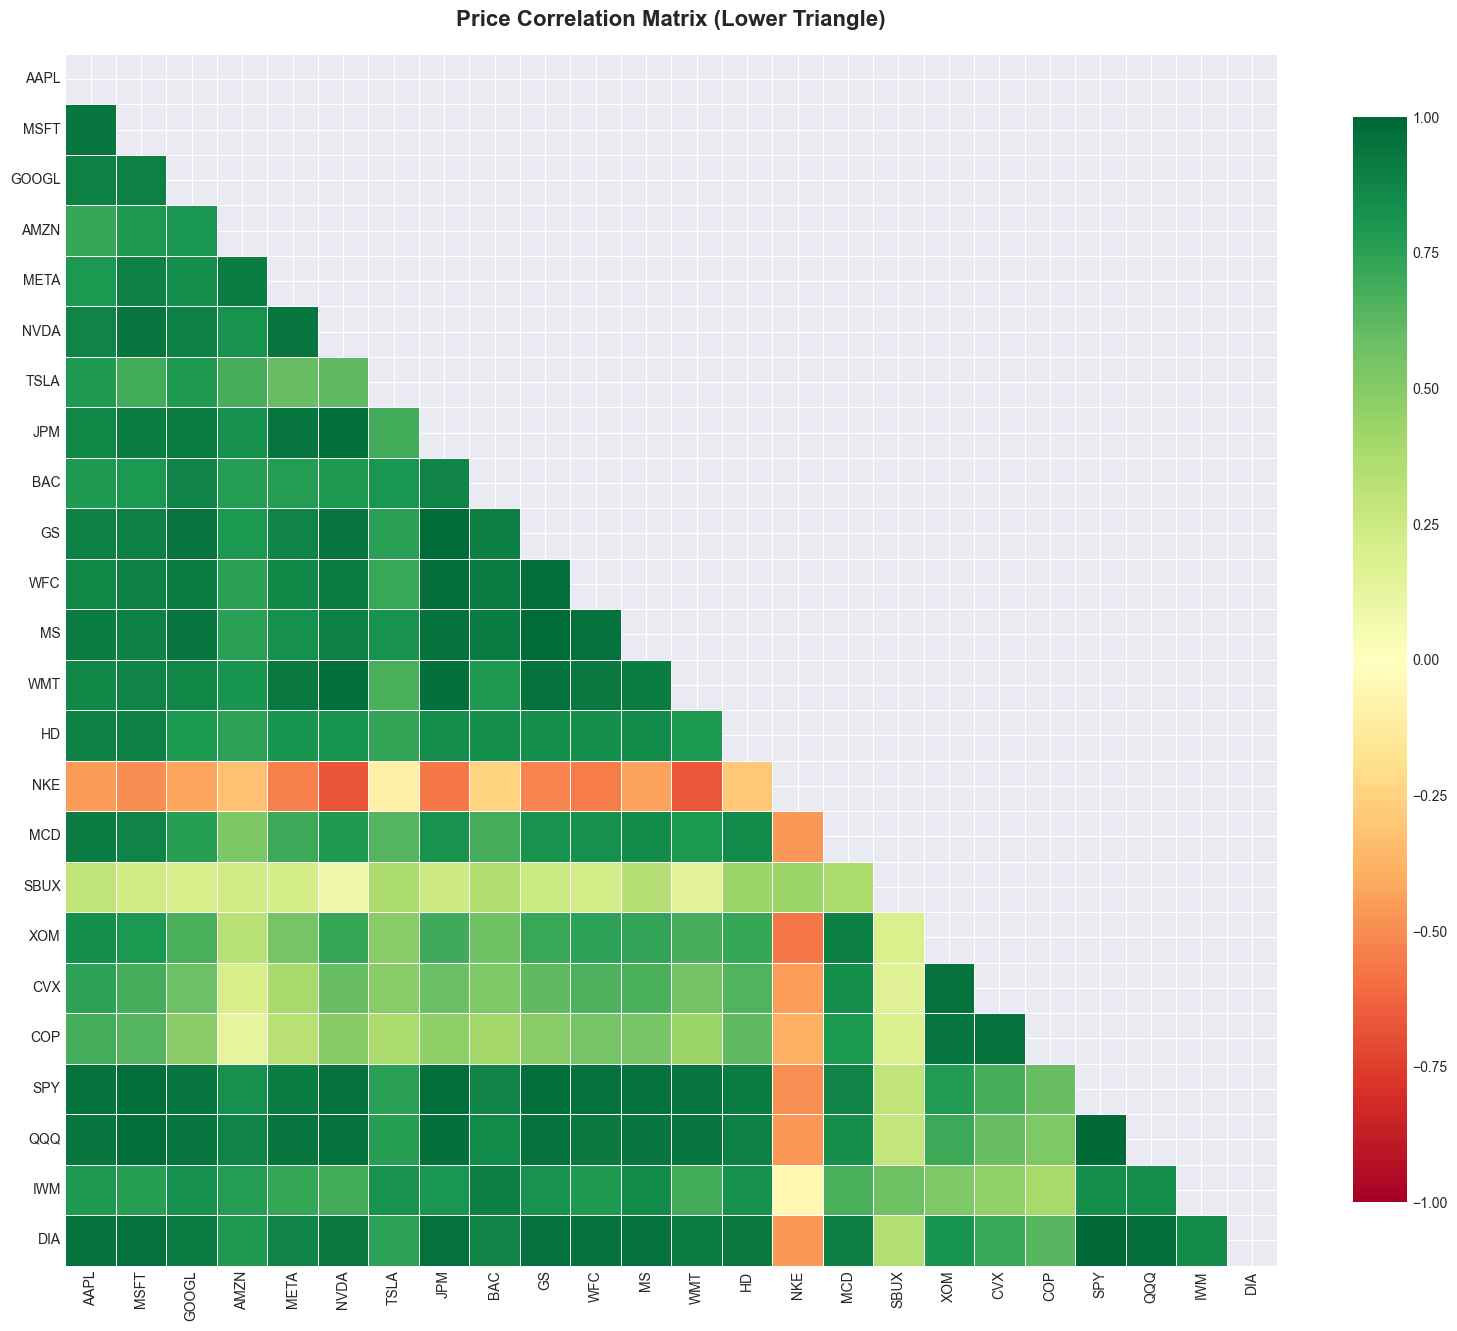


Correlation matrix shape: (24, 24)


In [ ]:
# Compute correlation matrix on prices (common for pairs trading)
corr_matrix = prices.corr()

# Plot heatmap
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='RdYlGn', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1)
plt.title('Price Correlation Matrix (Lower Triangle)', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print(f"\nCorrelation matrix shape: {corr_matrix.shape}")

## 7. High Correlation Pairs

Identify pairs with correlation > 0.85 as candidates for cointegration testing.

In [ ]:
# Find high correlation pairs
def find_high_corr_pairs(corr_matrix, threshold=0.85):
    """Find pairs with correlation above threshold."""
    pairs = []
    
    # Get upper triangle indices
    rows, cols = np.where(np.triu(np.ones_like(corr_matrix, dtype=bool), k=1))
    
    for i, j in zip(rows, cols):
        corr_val = corr_matrix.iloc[i, j]
        if corr_val >= threshold:
            pairs.append({
                'Symbol_1': corr_matrix.index[i],
                'Symbol_2': corr_matrix.columns[j],
                'Correlation': corr_val
            })
    
    return pd.DataFrame(pairs).sort_values('Correlation', ascending=False)

# Find candidates
correlation_threshold = 0.85
high_corr_pairs = find_high_corr_pairs(corr_matrix, threshold=correlation_threshold)

print(f"High Correlation Pairs (threshold = {correlation_threshold}):")
print(f"Found {len(high_corr_pairs)} candidate pairs\n")
print(high_corr_pairs.to_string(index=False))

# Save for later use
high_corr_pairs.to_csv('../results/high_correlation_pairs.csv', index=False)
print(f"\n✓ Saved to results/high_correlation_pairs.csv")

High Correlation Pairs (threshold = 0.85):
Found 102 candidate pairs

Symbol_1 Symbol_2  Correlation
     SPY      DIA       0.9930
     SPY      QQQ       0.9908
      GS       MS       0.9837
     JPM       GS       0.9809
     QQQ      DIA       0.9738
    MSFT      QQQ       0.9711
    MSFT      SPY       0.9707
     JPM      SPY       0.9701
     JPM      WFC       0.9693
      GS      WFC       0.9682
     JPM      QQQ       0.9654
     JPM      WMT       0.9651
    NVDA      WMT       0.9639
    NVDA      JPM       0.9637
      GS      SPY       0.9621
     XOM      CVX       0.9597
     JPM      DIA       0.9582
     WFC       MS       0.9581
      MS      SPY       0.9569
    MSFT      DIA       0.9569
      MS      DIA       0.9567
     CVX      COP       0.9560
    NVDA      QQQ       0.9548
    NVDA      SPY       0.9533
      GS      DIA       0.9533
     WFC      SPY       0.9525
     JPM       MS       0.9519
    AAPL      DIA       0.9517
    AAPL      SPY       0.9515


## 8. Visualize Sample Pair

Plot a sample high-correlation pair to visually inspect co-movement.

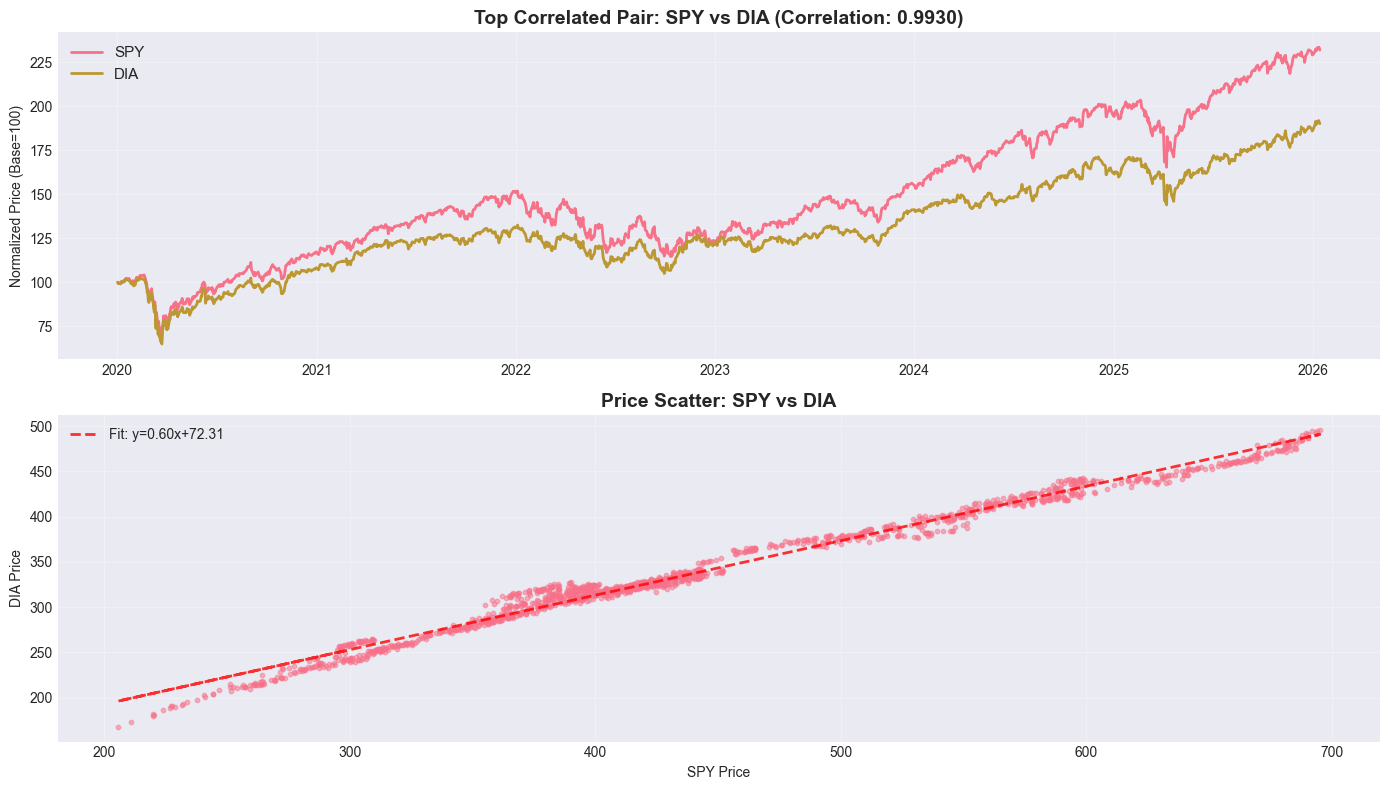

In [ ]:
if len(high_corr_pairs) > 0:
    # Get top pair
    top_pair = high_corr_pairs.iloc[0]
    sym1, sym2 = top_pair['Symbol_1'], top_pair['Symbol_2']
    corr_val = top_pair['Correlation']
    
    # Plot the pair
    fig, axes = plt.subplots(2, 1, figsize=(14, 8))
    
    # Normalized prices
    norm1 = (prices[sym1] / prices[sym1].iloc[0]) * 100
    norm2 = (prices[sym2] / prices[sym2].iloc[0]) * 100
    
    axes[0].plot(norm1.index, norm1, label=sym1, linewidth=2)
    axes[0].plot(norm2.index, norm2, label=sym2, linewidth=2)
    axes[0].set_title(f'Top Correlated Pair: {sym1} vs {sym2} (Correlation: {corr_val:.4f})', 
                      fontsize=14, fontweight='bold')
    axes[0].set_ylabel('Normalized Price (Base=100)')
    axes[0].legend(loc='best', fontsize=11)
    axes[0].grid(True, alpha=0.3)
    
    # Scatter plot
    axes[1].scatter(prices[sym1], prices[sym2], alpha=0.5, s=10)
    axes[1].set_xlabel(f'{sym1} Price')
    axes[1].set_ylabel(f'{sym2} Price')
    axes[1].set_title(f'Price Scatter: {sym1} vs {sym2}', fontsize=14, fontweight='bold')
    axes[1].grid(True, alpha=0.3)
    
    # Add trendline
    z = np.polyfit(prices[sym1], prices[sym2], 1)
    p = np.poly1d(z)
    axes[1].plot(prices[sym1], p(prices[sym1]), "r--", alpha=0.8, linewidth=2, label=f'Fit: y={z[0]:.2f}x+{z[1]:.2f}')
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()
else:
    print("No pairs found with correlation > threshold")

## 9. Summary & Next Steps

**Key Findings:**
- Successfully loaded and validated price data for our universe
- Identified high-correlation pairs as candidates
- Data quality is good with no missing values (after alignment)

**Next Steps (Week 1):**
1. Implement cointegration testing for high-correlation pairs
2. Estimate hedge ratios using OLS regression
3. Calculate spreads and z-scores
4. Build automated pair selection pipeline

**Files Generated:**
- `results/high_correlation_pairs.csv` - Candidate pairs for cointegration testing